## Observations and Insights 

In [76]:
import scipy.stats as st


In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results,on='Mouse ID')

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
# Checking the number of mice.
#no_of_mice = len(combined_data['Mouse ID'].unique())
no_of_mice = len(mouse_metadata)
no_of_mice

249

In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
clean_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse)==False]
len(clean_df['Mouse ID'].unique())

248

In [20]:
# Optional: Get all the data for the duplicate mouse ID. 


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({
    'Mean-Tumor Volume': mean, 
    'Median-Tumor Volume': median, 
    'Variance-Tumor Volume': var, 
    'Standard Deviation-Tumor Volume': std, 
    'SEM-Tumor Volume': sem
})
summary_df

,Mean-Tumor Volume,Median-Tumor Volume,Variance-Tumor Volume,Standard Deviation-Tumor Volume,SEM-Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_stat = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    'mean', 'median', 'var', 'std', 'sem'
])
summary_stat

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


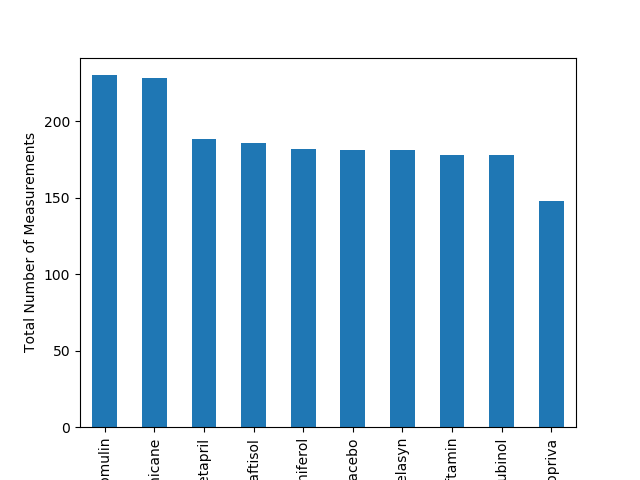

In [61]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

bar_measurements = clean_df['Drug Regimen'].value_counts()
bar_measurements.plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
#plt.figure(figsize=(2,3))
plt.show()

<IPython.core.display.Javascript object>


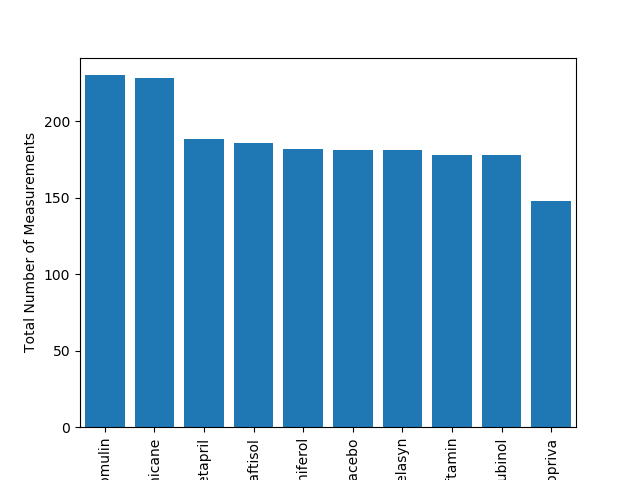

In [59]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
bar_measurements1 = clean_df['Drug Regimen'].value_counts()
plt.bar(bar_measurements1.index.values, bar_measurements1.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.show()

<IPython.core.display.Javascript object>


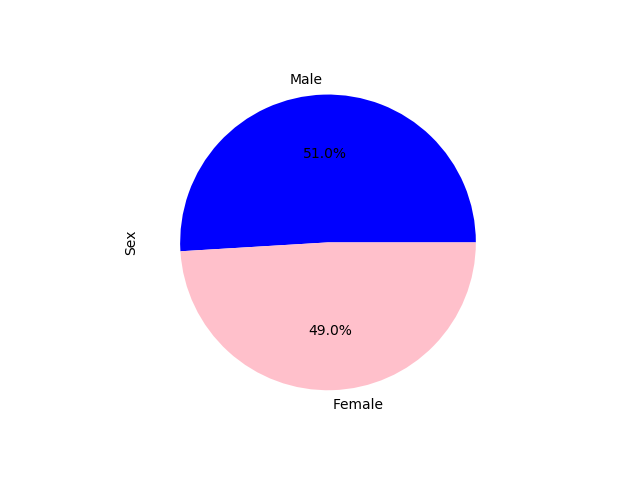

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genders = ['Male', 'Female']
gender_counts = clean_df['Sex'].value_counts()
colors = ['blue', 'pink']
gender_counts.plot(kind="pie",autopct='%1.1f%%',colors=colors)


<IPython.core.display.Javascript object>


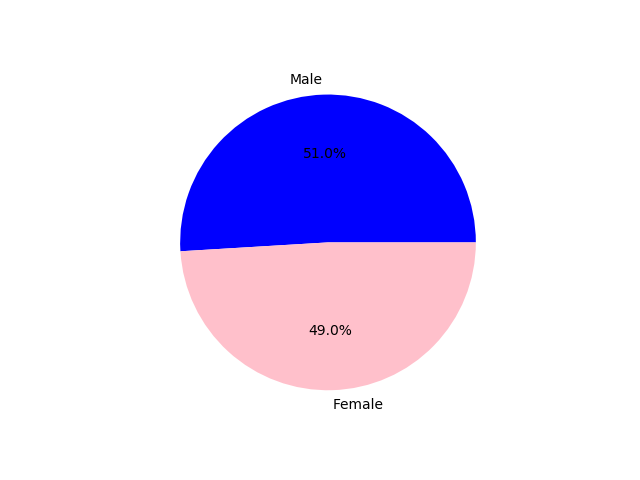

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = clean_df['Sex'].value_counts()
plt.pie(gender_counts, labels=genders, autopct='%1.1f%%', colors=colors)
plt.show()


## Quartiles, Outliers and Boxplots

In [73]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = max_tumor.merge(clean_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [80]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_regimens:
     
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    IQR = upper_quartile - lower_quartile 
    lower_bound = lower_quartile - 1.5 * IQR
    upper_bound = upper_quartile + 1.5 * IQR 
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{treatment}'s outliers are: {outliers}")

Capomulin's outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


<IPython.core.display.Javascript object>


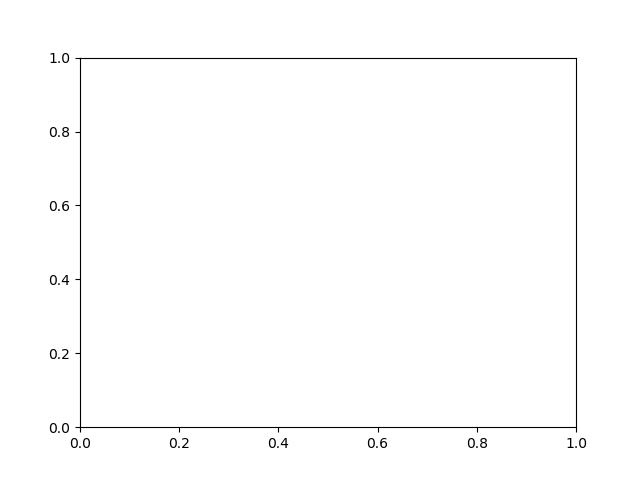

AttributeError: 'tuple' object has no attribute 'set_title'

In [81]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
x_axis = plt.subplots()
x_axis.set_title('Final Tumor Volume')
x_axis.set_ylabel('')
x_axis.boxplot()
plt.show()


## Line and Scatter Plots

In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_tumor = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
line_plot_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
